# Hijerarhijsko klasterovanje

Hijerarhijsko klasterovanje je **metoda grupisanja podataka u obliku stabla (hijerarhije)**.
Umesto da odmah podeliš podatke u K grupa, algoritam pravi **strukturu ugnježdenih klastera** – tako da kasnije možeš iseći stablo na željenom nivou i dobiti proizvoljan broj klastera.

Glavna ideja:
- Ako su podaci veoma slični → završiće u istom čvoru (klasteru).
- Ako su različiti → razdvajaju se u različite grane stabla.

Postoje dva pristupa:

a) Agregativno (aglomerativno) – bottom-up
- Krećeš od pretpostavke da je svaki podatak svoj klaster.
- Zatim spajaš najbliže klastere jedan po jedan.
- Na kraju dobiješ jedno veliko stablo koje obuhvata sve podatke.
👉 Ovo je najčešće korišćen pristup.

b) Divizivno – top-down
- Krećeš od jednog klastera koji sadrži sve podatke.
- Zatim ga deliš na dva, pa dalje na manje delove.
- Nastavljaš dok ne dobiješ pojedinačne tačke.

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('../10/dogs.csv')
df.head()

,breed,height,weight
0,Border Collie,20,45
1,Boston Terrier,16,20
2,Brittany Spaniel,18,35
3,Bullmastiff,27,120
4,Chihuahua,8,8


In [5]:
feature_names = df.columns[1:]

In [6]:
X = df[feature_names]
X

,height,weight
0,20,45
1,16,20
2,18,35
3,27,120
4,8,8
5,25,78
6,23,70
7,32,160
8,21,50
9,19,65


In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
scaler = MinMaxScaler()

In [9]:
X = scaler.fit_transform(X)

In [11]:
X = pd.DataFrame(X, columns=feature_names)
X

,height,weight
0,0.538462,0.248366
1,0.384615,0.084967
2,0.461538,0.183007
3,0.807692,0.738562
4,0.076923,0.006536
5,0.730769,0.464052
6,0.653846,0.411765
7,1.000000,1.000000
8,0.576923,0.281046
9,0.500000,0.379085


In [12]:
from sklearn.cluster import AgglomerativeClustering

In [14]:
model = AgglomerativeClustering(linkage='average', n_clusters=3)

In [15]:
model.fit(X)

,n_clusters,3
,metric,'euclidean'
,memory,None
,connectivity,None
,compute_full_tree,'auto'
,linkage,'average'
,distance_threshold,None
,compute_distances,False


In [16]:
model.labels_

array([1, 1, 1, 0, 2, 1, 1, 0, 1, 1, 2])

In [17]:
model.children_

array([[ 0,  8],
       [ 4, 10],
       [ 5,  6],
       [ 1,  2],
       [ 9, 11],
       [14, 15],
       [13, 16],
       [ 3,  7],
       [12, 17],
       [18, 19]])

Silhouette score meri koliko je dobro svaki podatak raspoređen u svoj klaster u odnosu na ostale klastere.
Intuitivno:
- Da li je tačka blizu svom klasteru (dobro pripada tamo)?
- Da li je tačka daleko od drugih klastera (jasno odvojena)?

In [20]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [19]:
silhouette_score(X, model.labels_)

0.5813924452451538

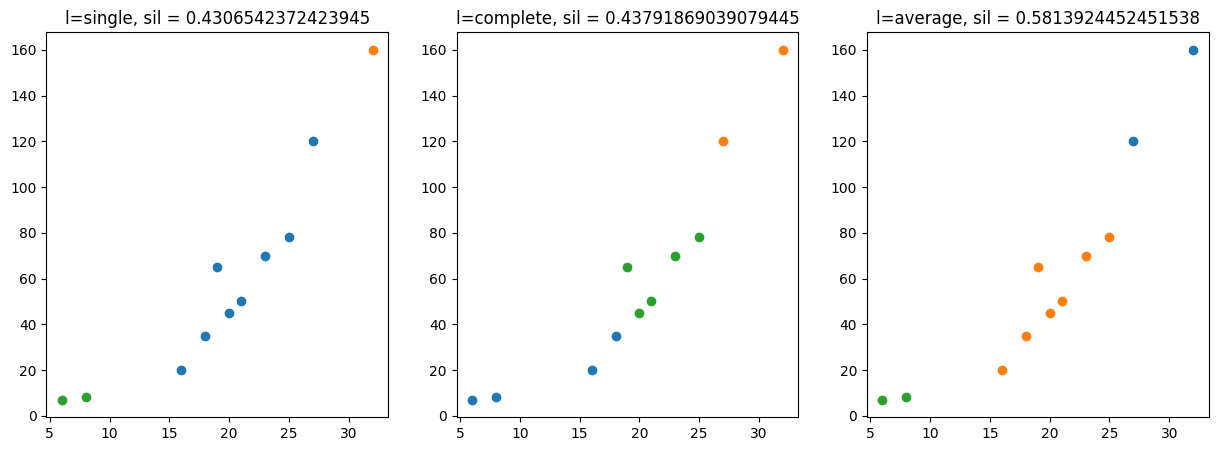

In [22]:
k = 3
linkages = ['single', 'complete', 'average']
fig = plt.figure(figsize=(15,5))
for idx, linkage in enumerate(linkages):
    model = AgglomerativeClustering(n_clusters=k, linkage=linkage)
    model.fit(X)

    fig.add_subplot(1, len(linkages), idx+1)
    idx += 1 
    
    for cluster_label in range(k):
        cluster = df[model.labels_ == cluster_label]
        plt.scatter(cluster['height'], cluster['weight'], label = f'cluster {cluster_label}')
    plt.title(f'l={linkage}, sil = {silhouette_score(X, model.labels_)}')
plt.show()

In [23]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [24]:
z = linkage(X, method='single')
z

array([[ 0.        ,  8.        ,  0.05047034,  2.        ],
       [ 4.        , 10.        ,  0.07720025,  2.        ],
       [ 5.        ,  6.        ,  0.09301156,  2.        ],
       [ 2.        , 11.        ,  0.10094068,  3.        ],
       [ 9.        , 14.        ,  0.1246148 ,  4.        ],
       [ 1.        , 15.        ,  0.1246148 ,  5.        ],
       [13.        , 16.        ,  0.15167269,  7.        ],
       [ 3.        , 17.        ,  0.28508383,  8.        ],
       [12.        , 18.        ,  0.31753116, 10.        ],
       [ 7.        , 19.        ,  0.32454896, 11.        ]])

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [45.0, 45.0, 55.0, 55.0],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [75.0, 75.0, 92.5, 92.5],
  [65.0, 65.0, 83.75, 83.75],
  [50.0, 50.0, 74.375, 74.375],
  [35.0, 35.0, 62.1875, 62.1875],
  [20.0, 20.0, 48.59375, 48.59375],
  [5.0, 5.0, 34.296875, 34.296875]],
 'dcoord': [[0.0,
   np.float64(0.07720024854761205),
   np.float64(0.07720024854761205),
   0.0],
  [0.0, np.float64(0.0930115635997988), np.float64(0.0930115635997988), 0.0],
  [0.0, np.float64(0.05047034033286324), np.float64(0.05047034033286324), 0.0],
  [0.0,
   np.float64(0.10094068066572678),
   np.float64(0.10094068066572678),
   np.float64(0.05047034033286324)],
  [0.0,
   np.float64(0.12461479677668079),
   np.float64(0.12461479677668079),
   np.float64(0.10094068066572678)],
  [0.0,
   np.float64(0.12461479677668082),
   np.float64(0.12461479677668082),
   np.float64(0.12461479677668079)],
  [np.float64(0.0930115635997988),
   np.float64(0.1516726895756123),

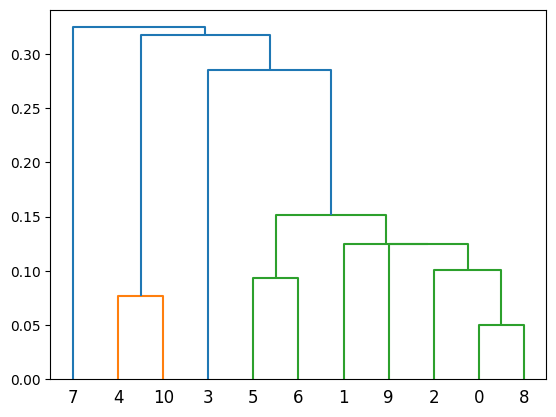

In [25]:
dendrogram(z)

In [26]:
X.set_index(df['breed'])
X

,height,weight
0,0.538462,0.248366
1,0.384615,0.084967
2,0.461538,0.183007
3,0.807692,0.738562
4,0.076923,0.006536
5,0.730769,0.464052
6,0.653846,0.411765
7,1.000000,1.000000
8,0.576923,0.281046
9,0.500000,0.379085
